In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns; sns.set()
import swat
import time
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')

# For the dataset without nulled consumers

In [3]:
df = pd.read_csv('data/dataset.csv', low_memory=False).drop(columns={'Installation_zone'})
df.head(5)

,Year,Month,Consumer_number,Consumer_type,Consumption,Installation_number
0,2013,1,21018,1,0,NaN
1,2013,1,36690,2,5,NaN
2,2013,1,17940,1,6,NaN
3,2013,1,14273,1,1,NaN
4,2013,1,5,1,13,NaN


In [4]:
monthes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
years = [2013, 2014, 2016, 2017, 2018, 2019, 2020]
colors = ['#023047', '#ffb703', '#8ecae6','#f1c0e8', '#f72585', '#006d77', '#7400b8',  '#ef476f', 
          '#757bc8', '#001233', '#00f5d4', '#8ac926', '#ffca3a','#b7094c', '#8338ec', '#ffc6ff', 
          '#70e000', '#0d47a1']

In [11]:
df_1 = df[(df['Year'] == 2018) | (df['Year'] == 2019) | (df['Year'] == 2020)].drop(columns={'Year', 'Installation_number', 'Consumer_type'})
df_1 = df_1.drop_duplicates().fillna(0)
df_1= df_1.groupby(['Consumer_number', 'Month'], as_index = False).sum()
df_1 = df_1.drop(df_1.index[0])
df_1.head(5)

,Consumer_number,Month,Consumption
1,1,4,31
2,1,5,208
3,1,6,245
4,1,7,706
5,1,8,308


In [61]:
df_2 = df[(df['Year'] == 2018) | (df['Year'] == 2019) | (df['Year'] == 2020)].drop(columns={'Year', 'Installation_number', 'Month', 'Consumption'})
df_2

,Consumer_number,Consumer_type
196921,21018,1
196922,49120,1
196923,17940,1
196924,14273,1
196925,5,1
...,...,...
352939,57283,1
352940,57284,9
352941,57285,9
352942,57286,9


In [12]:
df_pivot = df_1.pivot(index = 'Consumer_number', columns = 'Month', values = 'Consumption').fillna(0)
# print("len with nulled:", len(df_pivot))
df_pivot = df_pivot.rename_axis(None,axis=1).set_axis(monthes, inplace=False, axis=1).reset_index()
df_pivot = df_pivot.loc[~df_pivot[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].apply(lambda row: (row==0).all(), axis=1)]
print(df_pivot.head(5))
print("len without nulled:", len(df_pivot))

   Consumer_number     1     2     3     4      5      6      7      8     9  \
0                1   0.0   0.0   0.0  31.0  208.0  245.0  706.0  308.0   0.0   
1                5  17.0   0.0   0.0   7.0   15.0   15.0    8.0    0.0   0.0   
2               11   9.0   0.0   5.0   0.0    3.0    2.0    0.0   12.0   0.0   
3               15  49.0  20.0  24.0   0.0    7.0    5.0    0.0   12.0   0.0   
4               16   0.0   0.0   0.0   0.0    0.0    0.0   15.0    0.0  12.0   

    10   11    12  
0  0.0  0.0   0.0  
1  8.0  8.0  65.0  
2  2.0  0.0   0.0  
3  3.0  0.0   3.0  
4  0.0  4.0   0.0  
len without nulled: 21486


In [14]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_pivot)
tsne_results

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 21486 samples in 0.068s...
[t-SNE] Computed neighbors for 21486 samples in 0.417s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21486
[t-SNE] Computed conditional probabilities for sample 2000 / 21486
[t-SNE] Computed conditional probabilities for sample 3000 / 21486
[t-SNE] Computed conditional probabilities for sample 4000 / 21486
[t-SNE] Computed conditional probabilities for sample 5000 / 21486
[t-SNE] Computed conditional probabilities for sample 6000 / 21486
[t-SNE] Computed conditional probabilities for sample 7000 / 21486
[t-SNE] Computed conditional probabilities for sample 8000 / 21486
[t-SNE] Computed conditional probabilities for sample 9000 / 21486
[t-SNE] Computed conditional probabilities for sample 10000 / 21486
[t-SNE] Computed conditional probabilities for sample 11000 / 21486
[t-SNE] Computed conditional probabilities for sample 12000 / 21486
[t-SNE] Computed conditional probabilities for sa

array([[ -9.576767 ,  -4.1879153],
       [ -9.604413 ,  -4.17883  ],
       [ -9.605236 ,  -4.1789913],
       ...,
       [  5.1832433, -10.853589 ],
       [  5.183042 , -10.853662 ],
       [  5.198257 , -10.848037 ]], dtype=float32)

In [15]:
df_subset = pd.DataFrame(data=tsne_results, columns=['tsne-one', 'tsne-two'])
df_subset

,tsne-one,tsne-two
0,-9.576767,-4.187915
1,-9.604413,-4.178830
2,-9.605236,-4.178991
3,-9.604281,-4.179083
4,-9.603876,-4.179391
...,...,...
21481,5.183923,-10.853367
21482,5.183321,-10.853562
21483,5.183243,-10.853589
21484,5.183042,-10.853662


In [45]:
clf = DBSCAN(eps=0.4, min_samples=20).fit(df_subset)
labels = clf.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("\nClusters discovered: %d" % n_clusters_)
len(labels)


Clusters discovered: 10


21486

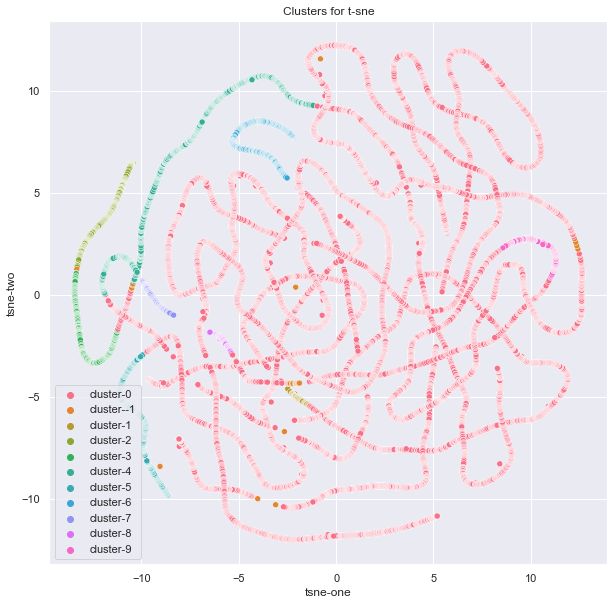

In [46]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(df_subset['tsne-one'], df_subset['tsne-two'], hue=["cluster-{}".format(x) for x in labels])
plt.title('Clusters for t-sne')
plt.savefig("charts/dbscan/t-sne_consumers.png", bbox_inches='tight')
plt.show()

In [76]:
labelsDf = pd.DataFrame(labels, columns = ['Label'])
labelsDf.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [77]:
labelsDf.loc[labelsDf["Label"] == 11, "Label"] = 10

In [82]:
df_subset = pd.DataFrame(data=tsne_results, columns=['tsne-one', 'tsne-two'])
resultDf = pd.merge(df_subset, df_pivot['Consumer_number'], left_index=True, right_index=True)
resultDf = pd.merge(resultDf, labelsDf['Label'], left_index=True, right_index=True).drop(columns=['tsne-one', 'tsne-two'])
resultDf.head()

,Consumer_number,Label
0,1,0
1,5,0
2,11,0
3,15,0
4,16,0


In [87]:
consumer_types = pd.read_csv('data/consumer_types.csv', low_memory=False)
consumer_types.head()

,Consumer_type,Name
0,1,DOMÉSTICO
1,2,COM/INDUSTRIAL/OBRAS
2,3,UTIL.PUBLICA
3,4,OBRAS
4,5,ESTADO


In [90]:
types = df.drop(columns=['Year', 'Month', 'Consumption', 'Installation_number'])
types = types.drop_duplicates()
types = pd.merge(types, consumer_types, left_on='Consumer_type', right_on='Consumer_type', how='inner')
types  = pd.merge(types, resultDf, left_on='Consumer_number', right_on='Consumer_number', how='inner')
types = types.drop(columns={'Consumer_number'})
types ['Count'] = types ['Consumer_type']
types.head()

,Consumer_type,Name,Label,Count
0,1,DOMÉSTICO,0,1
1,1,DOMÉSTICO,0,1
2,1,DOMÉSTICO,4,1
3,1,DOMÉSTICO,0,1
4,1,DOMÉSTICO,0,1


In [91]:
df_final = types.groupby(['Label','Name', 'Consumer_type'], as_index=False).agg({'Count':'count'})
df_final.loc[df_final["Label"] == -1, "Label"] = 8
df_final = df_final.rename(columns={'Label': 'Cluster'}).drop(columns=['Consumer_type'])
df_final.head()

,Cluster,Name,Count
0,0,COM/INDUSTRIAL/OBRAS,1114
1,0,COM./RURAL A.S,11
2,0,CP.COM/RURAL,1
3,0,CP.DOM/URB,42
4,0,DOM./RURAL A.S,435


In [92]:
df_pivot = pd.pivot(df_final, values='Count', index=['Cluster'], columns=['Name']).fillna(0)
df_pivot = df_pivot.rename_axis(None,axis=1).reset_index()

In [93]:
df_pivot_1 = df_pivot[~df_pivot['Cluster'].isin([0, 10])]
df_pivot_2 = df_pivot[df_pivot.Cluster == 0]
df_pivot_3 = df_pivot.loc[ (df_pivot.Cluster == 10)]

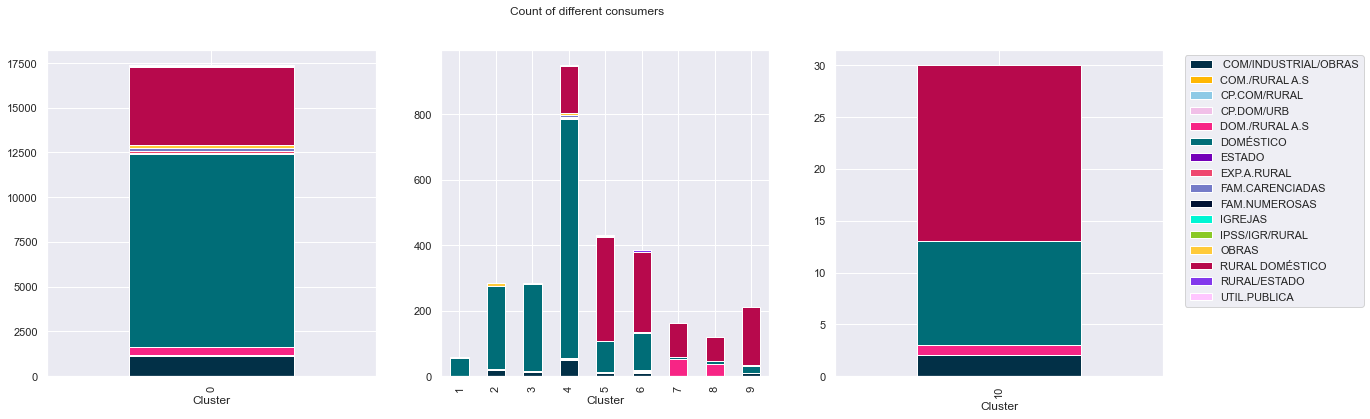

In [95]:
fig, axs = plt.subplots(ncols=3, figsize=(20,6))
df_pivot_2.plot(x = 'Cluster', kind='bar', stacked=True, color=colors, ax=axs[0]).legend().set_visible(False)
df_pivot_1.plot(x = 'Cluster', kind='bar', stacked=True, color=colors, ax=axs[1]).legend().set_visible(False)
df_pivot_3.plot(x = 'Cluster', kind='bar', stacked=True, color=colors, ax=axs[2]).legend(bbox_to_anchor=(1.05, 1))
 
fig.suptitle('Count of different consumers')
# plt.gca().set_aspect('equal', adjustable='box') 
plt.savefig("charts/dbscan/t-sne_profile_consumer.png", bbox_inches='tight')
plt.show()

In [63]:
df_final.loc[df_final["Label"] == -1, "Label"] = 20
df_final.head()

,Label,Count,Consumer_type
0,20,1,DOMÉSTICO
1,0,7052,DOMÉSTICO
2,1,102,DOMÉSTICO
3,2,515,DOMÉSTICO
4,3,274,DOMÉSTICO


In [65]:
df_pivot = pd.pivot(df_final, values='Count', index=['Label'],
                    columns=['Consumer_type']).fillna(0)
df_pivot = df_pivot.rename_axis(None,axis=1).reset_index()
df_pivot

,Label,COM/INDUSTRIAL/OBRAS,COM./RURAL A.S,CP.DOM/URB,DOM./RURAL A.S,DOMÉSTICO,ESTADO,EXP.A.RURAL,FAM.CARENCIADAS,FAM.NUMEROSAS,IGREJAS,IPSS/IGR/RURAL,OBRAS,RURAL DOMÉSTICO,RURAL/ESTADO,UTIL.PUBLICA
0,0,590.0,5.0,20.0,255.0,7052.0,40.0,55.0,38.0,3.0,2.0,12.0,58.0,2387.0,12.0,28.0
1,1,6.0,0.0,2.0,0.0,102.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2,25.0,0.0,3.0,0.0,515.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,2.0
3,3,18.0,0.0,1.0,0.0,274.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,16.0,1.0,0.0,62.0,189.0,4.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,5,2.0,0.0,1.0,1.0,57.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,3.0,0.0,0.0,0.0,47.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,242.0,4.0,0.0
7,7,44.0,0.0,0.0,6.0,269.0,0.0,5.0,5.0,0.0,0.0,2.0,6.0,181.0,2.0,1.0
8,8,3.0,0.0,0.0,0.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,115.0,0.0,0.0
9,9,9.0,0.0,3.0,2.0,92.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,178.0,5.0,0.0


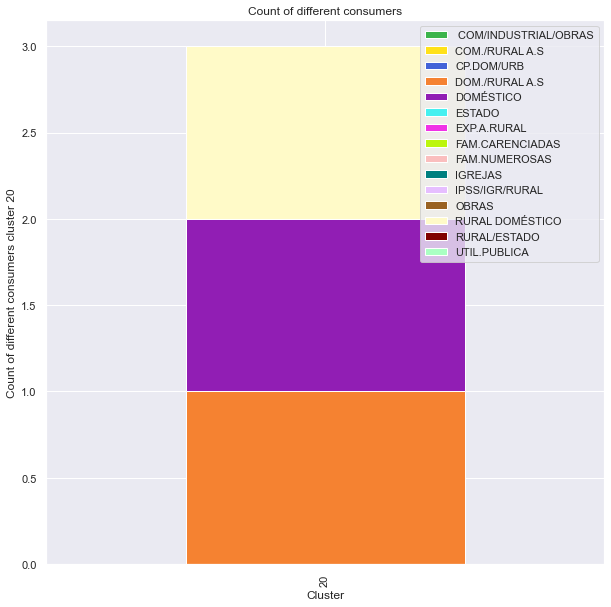

In [66]:
df_pivot_3 = df_pivot.loc[ (df_pivot.Label == 20)]
df_pivot_3.plot(figsize=(10,10), x = 'Label', kind='bar', stacked=True, color=['#3cb44b', '#ffe119', '#4363d8', 
                                                                     '#f58231', '#911eb4', '#46f0f0', '#f032e6',  '#bcf60c', 
                                                                     '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
                                                                     '#800000', '#aaffc3', '#ffd8b1', 
                                                                     '#000075', '#808080'])
 
# labels for x & y axis
plt.xlabel('Cluster')
plt.ylabel('Count of different consumers cluster 20')
 
# title of plot
plt.title('Count of different consumers')
plt.savefig("charts/dbscan/dbscan_pca_cluster_20_profile.png", bbox_inches='tight')
plt.show()

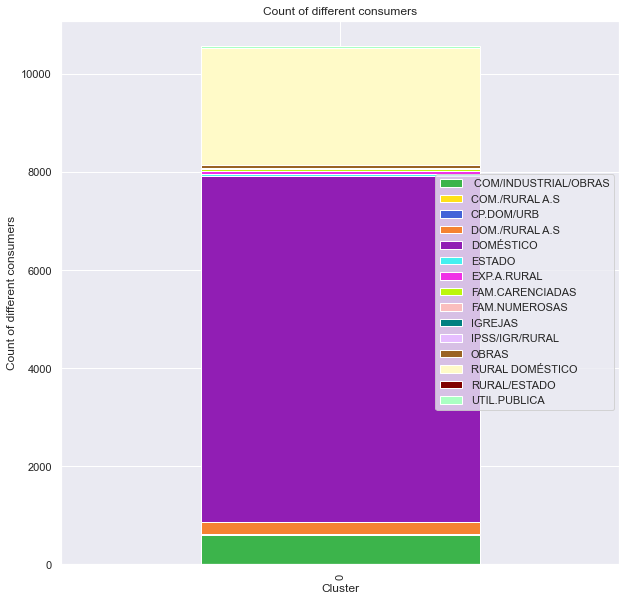

In [69]:
df_pivot_1 = df_pivot.loc[df_pivot['Label'] == 0]

df_pivot_1.plot(figsize=(10,10), x = 'Label', kind='bar', stacked=True, color=['#3cb44b', '#ffe119', '#4363d8', 
                                                                     '#f58231', '#911eb4', '#46f0f0', '#f032e6',  '#bcf60c', 
                                                                     '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
                                                                     '#800000', '#aaffc3', '#ffd8b1', 
                                                                     '#000075', '#808080'])
 
# labels for x & y axis
plt.xlabel('Cluster')
plt.ylabel('Count of different consumers')
 
# title of plot
plt.title('Count of different consumers')
plt.savefig("charts/dbscan/dbscan_pca_cluster0_profile.png", bbox_inches='tight')
plt.show()

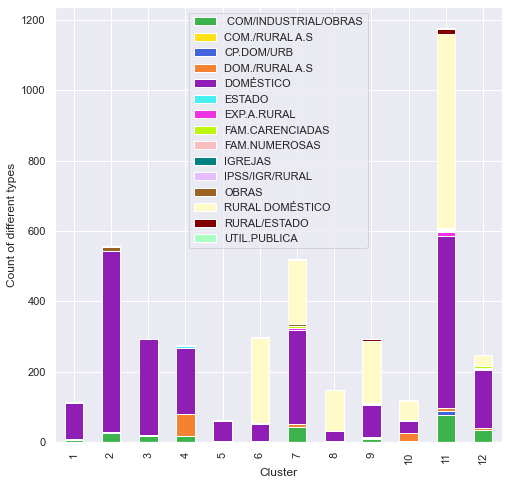

In [70]:
df_pivot_2 = df_pivot[df_pivot.Label != 20]
df_pivot_2 = df_pivot_2[df_pivot_2.Label != 0]
df_pivot_2.plot.bar(figsize=(8,8), x = 'Label', stacked=True, color=['#3cb44b', '#ffe119', '#4363d8', 
                                                                     '#f58231', '#911eb4', '#46f0f0', '#f032e6',  '#bcf60c', 
                                                                     '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
                                                                     '#800000', '#aaffc3', '#ffd8b1', 
                                                                     '#000075', '#808080'])
 
# labels for x & y axis
plt.xlabel('Cluster')
plt.ylabel('Count of different types')

plt.savefig("charts/dbscan/dbscan_t-sne_profiles.png", bbox_inches='tight', sharex=False)
plt.show()

In [49]:
df_pivot_1 = df_pivot.drop(index=[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
df_pivot_1

Consumer_type,1,2,3,4,5,6,7,9,10,11,12,14,18,19,20
1,7052.0,590.0,28.0,58.0,40.0,2.0,55.0,2387.0,12.0,3.0,38.0,20.0,12.0,255.0,5.0


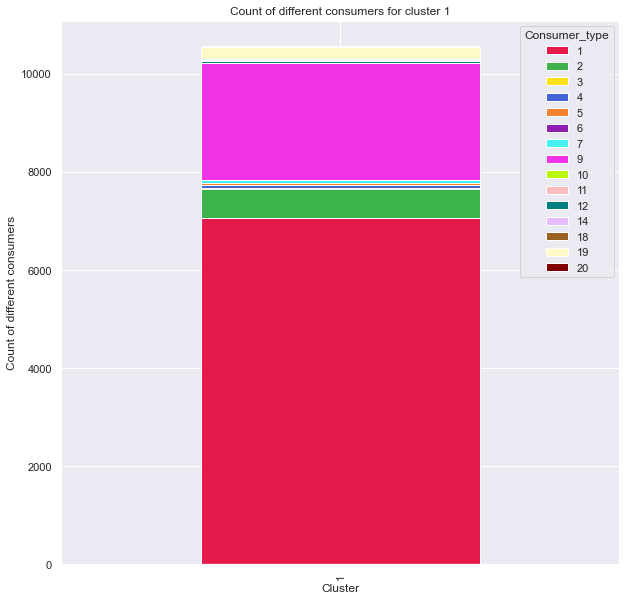

In [56]:
df_pivot_1.plot(figsize=(10,10), kind='bar', stacked=True, color=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', 
                                               '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', 
                                               '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000'])
plt.xlabel('Cluster')
plt.ylabel('Count of different consumers')
 
# title of plot
plt.title('Count of different consumers for cluster 1')
plt.savefig("charts/dbscan/dbscan_t-sne_cluster1_profile.png", bbox_inches='tight')
plt.show()

In [57]:
df_pivot2 = df_pivot.drop(index=[1])

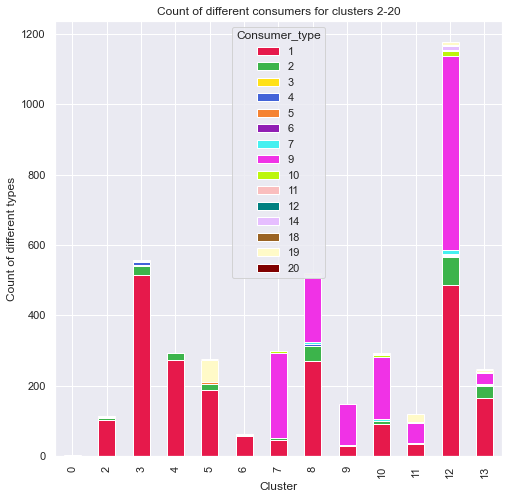

In [58]:
df_pivot2.plot(figsize=(8,8), kind='bar', stacked=True, color=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', 
                                               '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', 
                                               '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000'])
 
# labels for x & y axis
plt.xlabel('Cluster')
plt.ylabel('Count of different types')
 
# title of plot
plt.title('Count of different consumers for clusters 2-20')
plt.savefig("charts/dbscan/dbscan_t-sne_profile.png", bbox_inches='tight')
plt.show()